## AdaGrad

$$
\begin{split}
\theta_{t+1,i}&=\theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii}+\epsilon}}\cdot g_{t,i\cdot}\\
G&=\sum_{\tau=1}^tg_\tau g_\tau^T
\end{split}
$$

- $i$ 表示 parameter（$\theta$） 的 index；
- $G$ 是历史梯度信息的平方；
    - $G$ 是一个方阵，对角 $G_{,ii}$ 表示 $\sum_{t}g_{t,i}^2$
    - running sum
- $G_{t,ii}$
    - 作为 $\eta$ 的 scaling factor；
- Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. 
    - sparse or dense
        - sparse: BoW (Bag of Words)
    - The more updates a parameter receives, the smaller the learning rate.


$$
f(x)=0.1x_1^2 + 2x_2^2
$$

In [51]:
import math
import torch

In [34]:
def f(x):
    return 0.1 * x[0] ** 2 + 2 * x[1] ** 2

In [35]:
def f_grad(x):
    return 0.2*x[0], 4*x[1]

In [79]:
def adagrad_step(x, s, f_grad, eta=1e-2, eps=1e-6):
    g = f_grad(x)
    s[0] += g[0]**2
    s[1] += g[1]**2
    x[0] -= eta / math.sqrt(s[0] + eps) * g[0]
    x[1] -= eta / math.sqrt(s[1] + eps) * g[1]
#     x[0] -= eta * g[0]
#     x[1] -= eta * g[1]
    return x, s

In [80]:
def train(step, x0, s0, f_grad, steps=20, eta=1e-2):
    traces = [x0.copy()]
    x = x0
    s = s0
    for i in range(steps):
        x, s = step(x, s, f_grad, eta)
        traces.append(x.copy())
    return traces

[-2.382562771979649, -0.15859055003666966]


Text(0, 0.5, 'x2')

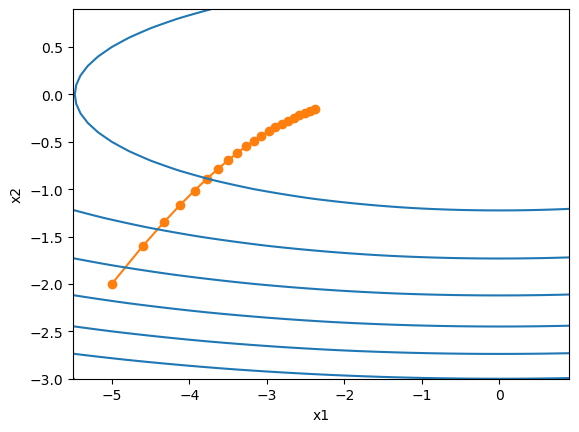

In [81]:
x0 = [-5, -2]
s0 = [0, 0]
traces = train(adagrad_step, x0, s0, f_grad, eta=.4)
print(traces[-1])
# traces

import matplotlib.pyplot as plt
plt.plot(*zip(*traces), '-o', color='#ff7f0e')
x1, x2 = torch.meshgrid(torch.arange(-5.5, 1., .1), 
               torch.arange(-3, 1., .1), indexing='ij')
plt.contour(x1, x2, f([x1, x2]), colors='#1f77b4')
plt.xlabel('x1')
plt.ylabel('x2')

[-0.002295340252192116, -1.4349291647375306e-162]


Text(0, 0.5, 'x2')

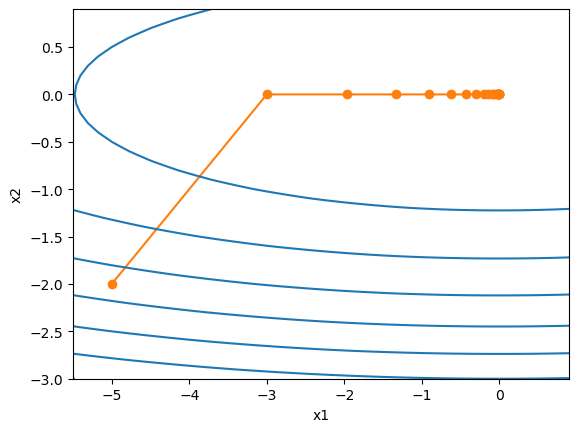

In [82]:
x0 = [-5, -2]
s0 = [0, 0]
traces = train(adagrad_step, x0, s0, f_grad, eta=2)
print(traces[-1])
# traces

import matplotlib.pyplot as plt
plt.plot(*zip(*traces), '-o', color='#ff7f0e')
x1, x2 = torch.meshgrid(torch.arange(-5.5, 1., .1), 
               torch.arange(-3, 1., .1), indexing='ij')
plt.contour(x1, x2, f([x1, x2]), colors='#1f77b4')
plt.xlabel('x1')
plt.ylabel('x2')

## rmsprop

In [87]:
def rmsprop_step(x, s, f_grad, eta=1e-2, gamma=0.9, eps=1e-6, ):
    g = f_grad(x)
    s[0] = gamma*s[0] + (1-gamma)*g[0]**2
    s[1] = gamma*s[1] + (1-gamma)*g[1]**2
    x[0] -= eta / math.sqrt(s[0] + eps) * g[0]
    x[1] -= eta / math.sqrt(s[1] + eps) * g[1]
    return x, s

[-0.01059867213411372, 1.0362121337275157e-14]


Text(0, 0.5, 'x2')

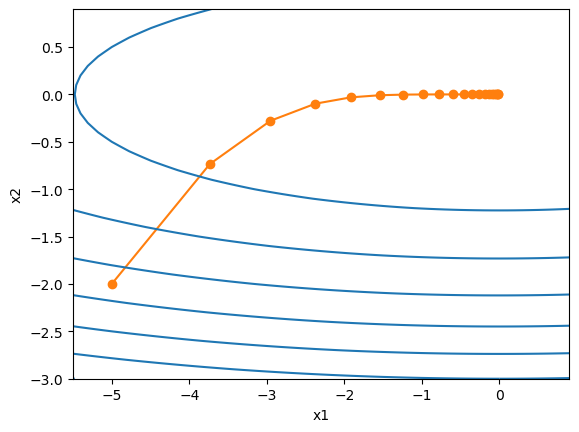

In [88]:
x0 = [-5, -2]
s0 = [0, 0]
traces = train(rmsprop_step, x0, s0, f_grad, eta=.4)
print(traces[-1])
# traces

import matplotlib.pyplot as plt
plt.plot(*zip(*traces), '-o', color='#ff7f0e')
x1, x2 = torch.meshgrid(torch.arange(-5.5, 1., .1), 
               torch.arange(-3, 1., .1), indexing='ij')
plt.contour(x1, x2, f([x1, x2]), colors='#1f77b4')
plt.xlabel('x1')
plt.ylabel('x2')